<a href="https://colab.research.google.com/github/ShreyansJain04/ES-335-Prerequisite-Test/blob/main/Prerequisite_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import jax
import jax.numpy as jnp
from jax import grad
import sympy as sp
%matplotlib inline

## Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.


Matrix multiplication between a matrix A of size (n,k) and a matrix B of size (k,m) results in a matrix C of size (n,m).


*   **Multiplication:** Each element of the resulting matrix C is the dot product of a row of A and a column of B. For each  element in C, we multiply k pairs of numbers (since each row of A and each column of B has k elements). Now C has n*m elements, hence the total number of matrix multiplications is $n*k*m$
*   **Addtions:** For each of the n*m elements in C, we add k-1 numbers to get the dot product. So the total number of additions is $n*(k-1)*m$



## Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?



In [28]:
#Lets find out using code

n=4
k=5
m=3
num_iter=40

mat1 = np.random.randn(n,k)
mat2 = np.random.randn(k,m)
mat3 = np.zeros((n,m))
total_time=0

for _ in range(num_iter):
  start_time = time.time()
  for i in range(n):
    for j in range(m):
      element = 0
      for l in range(k):
        element += mat1[i][l]*mat2[l][j]
      mat3[i][j] = element
  end_time = time.time()
  manual_time = end_time - start_time
  total_time+=manual_time

average_total_time=total_time/num_iter
print(f"Final matrix: {mat3}")
print(f"Total time taken for matrix multiplication using list of lists, {average_total_time:.7f} ")

Final matrix: [[ 1.09073631 -2.8372277  -0.36040796]
 [-1.76103495  2.10715923  0.30024605]
 [-2.72662154  4.01338482  0.31724402]
 [-2.27528353  2.80700505 -0.86685804]]
Total time taken for matrix multiplication using list of lists, 0.0006029 


In [29]:
total_time_np=0
for _ in range(num_iter):
  start_time_np = time.time()
  mat3_np = np.matmul(mat1, mat2)
  end_time_np = time.time()
  np_time = end_time_np - start_time_np
  total_time_np+=np_time
average_total_time_np=total_time_np/num_iter
print(f"Final matrix: {mat3_np}")
print(f"Total time taken for matrix multiplication using list of lists, {average_total_time_np:.7f} ")

Final matrix: [[ 1.09073631 -2.8372277  -0.36040796]
 [-1.76103495  2.10715923  0.30024605]
 [-2.72662154  4.01338482  0.31724402]
 [-2.27528353  2.80700505 -0.86685804]]
Total time taken for matrix multiplication using list of lists, 0.0000051 


We see that numpy operations are much faster than regular loop based multiplications. A major reason is that Numpy integrates C,C++ codes in Python which have much less execution time as compared to python. Also the implementations are more optimised.

## Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

The time complexity of the given method is $O(n^2)$.

A more effective approach might involve initially sorting it through a efficient algorithm, such as one with a time complexity of $O(nlog(n))$, like quicksort. Subsequently, identifying the middle elements in the sorted array would yield the median.

Lets see the time comparision of both of these methods and the numpy.median routine in terms of time.

In [4]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)


def find_median_method1(arr):
    def kth_highest(arr, k):
        arr_list = arr.tolist()
        for _ in range(k):
            max_element = max(arr_list)
            arr_list.remove(max_element)
        return max_element

    n = len(arr)
    if n % 2 == 1:
        return kth_highest(arr, (n + 1) // 2)
    else:
        return (kth_highest(arr, n // 2) + kth_highest(arr, n // 2 + 1)) / 2


def find_median_method2(arr):
    arr_sorted = quicksort(arr)
    n = len(arr_sorted)
    if n % 2 == 1:
        return arr_sorted[n // 2]
    else:
        return (arr_sorted[n // 2 - 1] + arr_sorted[n // 2]) / 2

np.random.seed(0)
test_array = np.random.randint(0, 1000, size=1000)

start_time = time.time()
median_method1 = find_median_method1(test_array)
time_method1 = time.time() - start_time

start_time = time.time()
median_method2 = find_median_method2(test_array)
time_method2 = time.time() - start_time

start_time = time.time()
median_numpy = np.median(test_array)
time_numpy = time.time() - start_time

print("Method 1 (Successive finding):")
print("Median:", median_method1)
print("Time:", time_method1, "seconds")

print("\nMethod 2 (Sorting):")
print("Median:", median_method2)
print("Time:", time_method2, "seconds")

print("\nNumpy Median:")
print("Median:", median_numpy)
print("Time:", time_numpy, "seconds")

Method 1 (Successive finding):
Median: 515.5
Time: 0.03551602363586426 seconds

Method 2 (Sorting):
Median: 515.5
Time: 0.005711555480957031 seconds

Numpy Median:
Median: 515.5
Time: 0.003389120101928711 seconds


In [5]:
# more robust testing of timing
num_cycles = 100
total_time_method1 = 0
total_time_method2 = 0
total_time_numpy = 0

for _ in range(num_cycles):
    test_array = np.random.randint(0, 1000, size=1000)

    start_time = time.time()
    _ = find_median_method1(test_array)
    total_time_method1 += time.time() - start_time

    start_time = time.time()
    _ = find_median_method2(test_array)
    total_time_method2 += time.time() - start_time

    start_time = time.time()
    _ = np.median(test_array)
    total_time_numpy += time.time() - start_time

average_time_method1 = total_time_method1 / num_cycles
average_time_method2 = total_time_method2 / num_cycles
average_time_numpy = total_time_numpy / num_cycles

average_time_method1, average_time_method2, average_time_numpy


(0.038818628787994386, 0.0053650569915771485, 0.0003279447555541992)

Method 1 is the slowest due to its $O(n^2)$ time complexity.
Method 2, using Quicksort, is significantly faster than Method 1 but still slower than the highly optimized numpy.median.
The numpy.median function remains the fastest option, showcasing the efficiency of optimized library routines.

## Q4. What is the gradient of the following function with respect to x and y?
$ x^2y + y^3\sin(x) $


Gradient w.r.t to x:

$\frac{\partial (x^2y + y^3sin(x))}{\partial x} = 2xy + y^3cos(x)$

Gradient w.r.t y:


$\frac{\partial (x^2y + y^3sin(x))}{\partial y} = x^2 + 3y^2sin(x)$

## Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [6]:
def f(x, y):
    return x**2*y + y**3*jnp.sin(x)


def analytical_gradient(x, y):
    df_dx = 2*x*y + np.cos(x)*y**3
    df_dy = x**2 + 3*y**2*np.sin(x)
    return df_dx, df_dy

grad_f = jax.grad(f, (0, 1))
test_points = [(np.random.uniform(-10, 10), np.random.uniform(-10, 10)) for _ in range(5)]

for point in test_points:
    x, y = point
    grad_evaluated = grad_f(x, y)
    grad_analytical = analytical_gradient(x,y)
    print(f"Point: {point}, "
          f"Gradient (JAX): {grad_evaluated}, "
          f"Gradient (Analytical): {grad_analytical}, "
          )

Point: (1.7977081574303728, -0.8849928921260268), Gradient (JAX): (Array(-3.025983, dtype=float32, weak_type=True), Array(5.5211606, dtype=float32, weak_type=True)), Gradient (Analytical): (-3.025983037691766, 5.521160768285925), 
Point: (-3.8936090543794872, -9.989898284313938), Gradient (JAX): (Array(805.89557, dtype=float32, weak_type=True), Array(219.68019, dtype=float32, weak_type=True)), Gradient (Analytical): (805.8954531422323, 219.68018933735743), 
Point: (-3.9377941021887253, -0.9994014984841204), Gradient (JAX): (Array(8.569046, dtype=float32, weak_type=True), Array(17.647772, dtype=float32, weak_type=True)), Gradient (Analytical): (8.569046171133662, 17.647769986078316), 
Point: (3.7704300460663767, -9.186722778811818), Gradient (JAX): (Array(557.7359, dtype=float32, weak_type=True), Array(-134.71008, dtype=float32, weak_type=True)), Gradient (Analytical): (557.7359459862645, -134.71007005831876), 
Point: (-8.401712592163399, -6.12421475477719), Gradient (JAX): (Array(222.5

## Q6. Use sympy to confirm that you obtain the same gradient analytically.

In [7]:
x,y=sp.symbols('x y')
func=(x**2)*y+(y**3)*sp.sin(x)
df_dx = sp.diff(func, x)
df_dy = sp.diff(func, y)
display(sp.Eq(sp.Derivative(func, x), df_dx))
display(sp.Eq(sp.Derivative(func, y), df_dy))

Eq(Derivative(x**2*y + y**3*sin(x), x), 2*x*y + y**3*cos(x))

Eq(Derivative(x**2*y + y**3*sin(x), y), x**2 + 3*y**2*sin(x))

## Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2


In [8]:
student_records = {
    2022: {
        'Computer Science': {
            1: {
                'Name': 'Anika Patel',
                'Marks': {
                    'Math': 88,
                    'English': 83,
                    'Science': 77
                }
            },
            2: {
                'Name': 'Vivek Kumar',
                'Marks': {
                    'Math': 82,
                    'English': 90,
                    'Science': 86
                }
            },
            3: {
                'Name': 'Ishaan Sharma',
                'Marks': {
                    'Math': 75,
                    'English': 78,
                    'Science': 72
                }
            }
        },
        'Electrical Engineering': {
            4: {
                'Name': 'Riya Desai',
                'Marks': {
                    'Math': 91,
                    'English': 87,
                    'Science': 93
                }
            },
            5: {
                'Name': 'Aarav Jain',
                'Marks': {
                    'Math': 84,
                    'English': 75,
                    'Science': 83
                }
            },
            6: {
                'Name': 'Soham Mehta',
                'Marks': {
                    'Math': 79,
                    'English': 80,
                    'Science': 76
                }
            }
        },
        'Mechanical Engineering': {
            7: {
                'Name': 'Sara Vekaria',
                'Marks': {
                    'Math': 83,
                    'English': 86,
                    'Science': 89
                }
            },
            8: {
                'Name': 'Rohan Jain',
                'Marks': {
                    'Math': 93,
                    'English': 89,
                    'Science': 84
                }
            },
            9: {
                'Name': 'Amit Venkat',
                'Marks': {
                    'Math': 76,
                    'English': 74,
                    'Science': 78
                }
            }
        }
    },
    2023: {
        'Computer Science': {
            10: {
                'Name': 'Neha Patel',
                'Marks': {
                    'Math': 89,
                    'English': 82,
                    'Science': 86
                }
            },
            11: {
                'Name': 'Rahul Sharma',
                'Marks': {
                    'Math': 81,
                    'English': 91,
                    'Science': 87
                }
            },
            12: {
                'Name': 'Aishwarya Desai',
                'Marks': {
                    'Math': 77,
                    'English': 79,
                    'Science': 73
                }
            }
        },
        'Electrical Engineering': {
            13: {
                'Name': 'Arjun Shah',
                'Marks': {
                    'Math': 90,
                    'English': 88,
                    'Science': 92
                }
            },
            14: {
                'Name': 'Pooja Jain',
                'Marks': {
                    'Math': 83,
                    'English': 74,
                    'Science': 82
                }
            },
            15: {
                'Name': 'Rohit Mehta',
                'Marks': {
                    'Math': 78,
                    'English': 81,
                    'Science': 75
                }
            }
        },
        'Mechanical Engineering': {
            16: {
                'Name': 'Tanvi Sharma',
                'Marks': {
                    'Math': 82,
                    'English': 85,
                    'Science': 88
                }
            },
            17: {
                'Name': 'Rajat Kapoor',
                'Marks': {
                    'Math': 92,
                    'English': 88,
                    'Science': 83
                }
            },
            18: {
                'Name': 'Aanya Verma',
                'Marks': {
                    'Math': 75,
                    'English': 73,
                    'Science': 77
                }
            }
        }
    },
    2024: {
        'Computer Science': {
            19: {
                'Name': 'Anika Patel',
                'Marks': {
                    'Math': 88,
                    'English': 83,
                    'Science': 77
                }
            },
            20: {
                'Name': 'Vivek Kumar',
                'Marks': {
                    'Math': 82,
                    'English': 90,
                    'Science': 86
                }
            },
            21: {
                'Name': 'Ishaan Sharma',
                'Marks': {
                    'Math': 75,
                    'English': 78,
                    'Science': 72
                }
            }
        },
        'Electrical Engineering': {
            22: {
                'Name': 'Riya Desai',
                'Marks': {
                    'Math': 91,
                    'English': 87,
                    'Science': 93
                }
            },
            23: {
                'Name': 'Aarav Jain',
                'Marks': {
                    'Math': 84,
                    'English': 75,
                    'Science': 83
                }
            },
            24: {
                'Name': 'Soham Mehta',
                'Marks': {
                    'Math': 79,
                    'English': 80,
                    'Science': 76
                }
            }
        },
        'Mechanical Engineering': {
            25: {
                'Name': 'Sara Vekaria',
                'Marks': {
                    'Math': 83,
                    'English': 86,
                    'Science': 89
                }
            },
            26: {
                'Name': 'Rohan Jain',
                'Marks': {
                    'Math': 93,
                    'English': 89,
                    'Science': 84
                }
            },
            27: {
                'Name': 'Amit Venkat',
                'Marks': {
                    'Math': 76,
                    'English': 74,
                    'Science': 78
                }
            }
        }
    },


}

print(student_records)


{2022: {'Computer Science': {1: {'Name': 'Anika Patel', 'Marks': {'Math': 88, 'English': 83, 'Science': 77}}, 2: {'Name': 'Vivek Kumar', 'Marks': {'Math': 82, 'English': 90, 'Science': 86}}, 3: {'Name': 'Ishaan Sharma', 'Marks': {'Math': 75, 'English': 78, 'Science': 72}}}, 'Electrical Engineering': {4: {'Name': 'Riya Desai', 'Marks': {'Math': 91, 'English': 87, 'Science': 93}}, 5: {'Name': 'Aarav Jain', 'Marks': {'Math': 84, 'English': 75, 'Science': 83}}, 6: {'Name': 'Soham Mehta', 'Marks': {'Math': 79, 'English': 80, 'Science': 76}}}, 'Mechanical Engineering': {7: {'Name': 'Sara Vekaria', 'Marks': {'Math': 83, 'English': 86, 'Science': 89}}, 8: {'Name': 'Rohan Jain', 'Marks': {'Math': 93, 'English': 89, 'Science': 84}}, 9: {'Name': 'Amit Venkat', 'Marks': {'Math': 76, 'English': 74, 'Science': 78}}}}, 2023: {'Computer Science': {10: {'Name': 'Neha Patel', 'Marks': {'Math': 89, 'English': 82, 'Science': 86}}, 11: {'Name': 'Rahul Sharma', 'Marks': {'Math': 81, 'English': 91, 'Science'

## Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects

In [9]:
class Year():
    def __init__(self, year, branch_list) -> None:
        self.year = year
        self.branch_list = branch_list

class Branch():
    def __init__(self, branch_name, student_list) -> None:
        self.branch_name = branch_name
        self.student_list = student_list

class Student():
    def __init__(self, roll_no, name, marks:dict) -> None:
        self.roll_no = roll_no
        self.name = name
        self.marks = marks

database = []

students_cs = [Student(1, 'Viraj', {'Maths': 90, 'Physics': 85, 'Chemistry': 80}),
               Student(2, 'Siddharth', {'Maths': 90, 'Physics': 85, 'Chemistry': 80})]

students_ee = [Student(1, 'Viraj', {'Maths': 90, 'Physics': 85, 'Chemistry': 80}),
                Student(2, 'Siddharth', {'Maths': 90, 'Physics': 85, 'Chemistry': 80})]

branch1 = Branch("CS", students_cs)
branch2 = Branch("EE", students_ee)
year1 = Year(2023, [branch1, branch2])

database.append(year1)
print("Database:")
for year in database:
    print(f"Year: {year.year}")
    for branch in year.branch_list:
        print(f"  Branch: {branch.branch_name}")
        for student in branch.student_list:
            print(f"    Student: {student.name}, Roll No: {student.roll_no}, Marks: {student.marks}")

Database:
Year: 2023
  Branch: CS
    Student: Viraj, Roll No: 1, Marks: {'Maths': 90, 'Physics': 85, 'Chemistry': 80}
    Student: Siddharth, Roll No: 2, Marks: {'Maths': 90, 'Physics': 85, 'Chemistry': 80}
  Branch: EE
    Student: Viraj, Roll No: 1, Marks: {'Maths': 90, 'Physics': 85, 'Chemistry': 80}
    Student: Siddharth, Roll No: 2, Marks: {'Maths': 90, 'Physics': 85, 'Chemistry': 80}


## Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
* $ y = x  $
* $ y = x^2  $
* $ y = \frac{x^3}{100}  $
* $ y = \sin(x)$

* $ y = \frac{\sin(x)}{x}  $
* $ y = \log(x)  $
* $ y = e^x  $

In [10]:
x=np.arange(0.5,100,0.5)
x

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ,
       22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5,
       28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. ,
       33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5,
       39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. ,
       44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5,
       50. , 50.5, 51. , 51.5, 52. , 52.5, 53. , 53.5, 54. , 54.5, 55. ,
       55.5, 56. , 56.5, 57. , 57.5, 58. , 58.5, 59. , 59.5, 60. , 60.5,
       61. , 61.5, 62. , 62.5, 63. , 63.5, 64. , 64.5, 65. , 65.5, 66. ,
       66.5, 67. , 67.5, 68. , 68.5, 69. , 69.5, 70. , 70.5, 71. , 71.5,
       72. , 72.5, 73. , 73.5, 74. , 74.5, 75. , 75

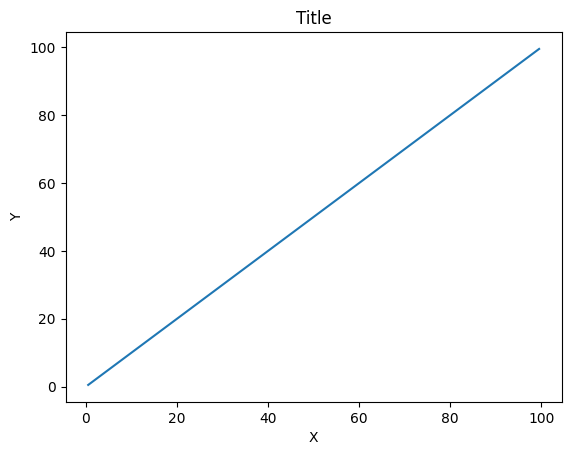

In [11]:
#1
y=x
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

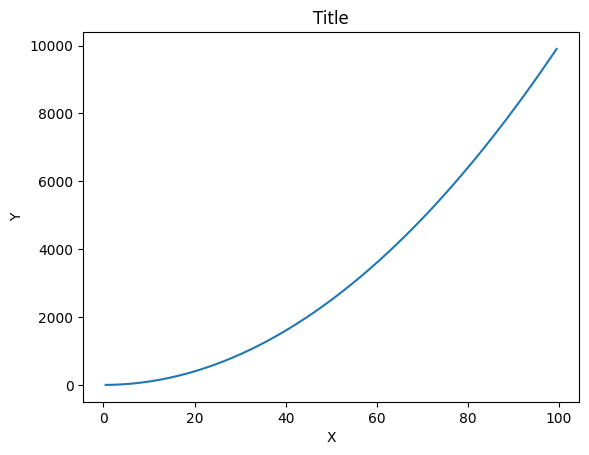

In [12]:
#2
y=x**2
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

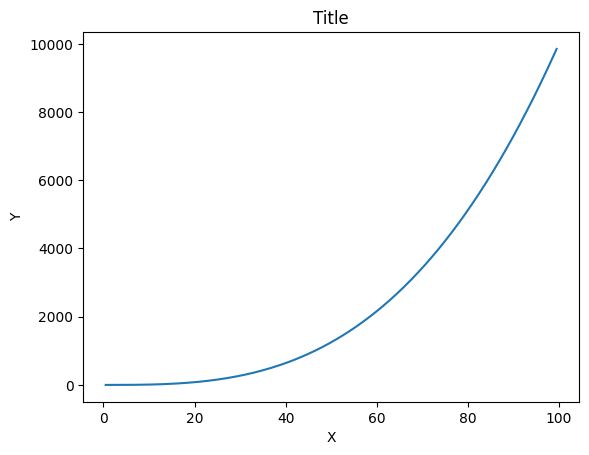

In [13]:
#3
y=x**3/100
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

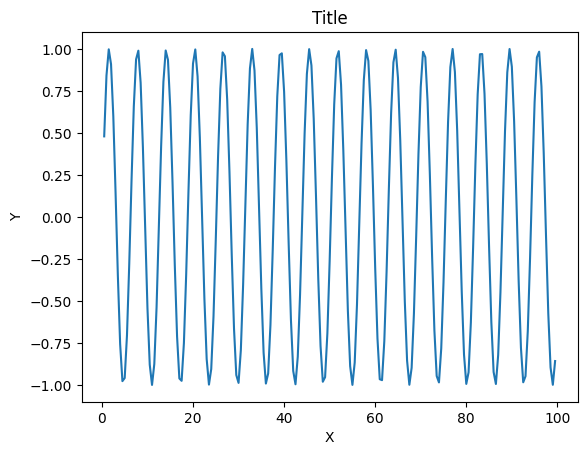

In [14]:
#4
y=np.sin(x)
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

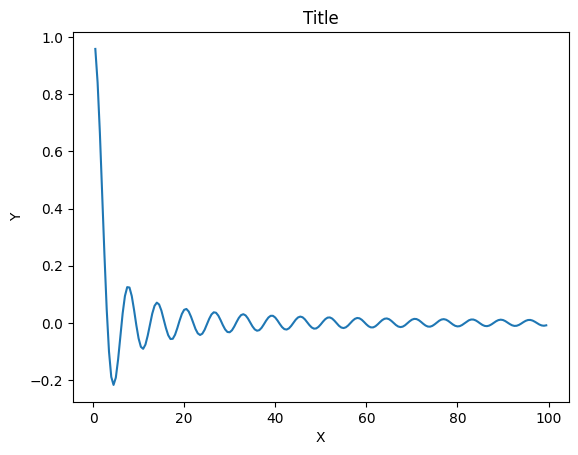

In [15]:
#5
y=np.sin(x)/x
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

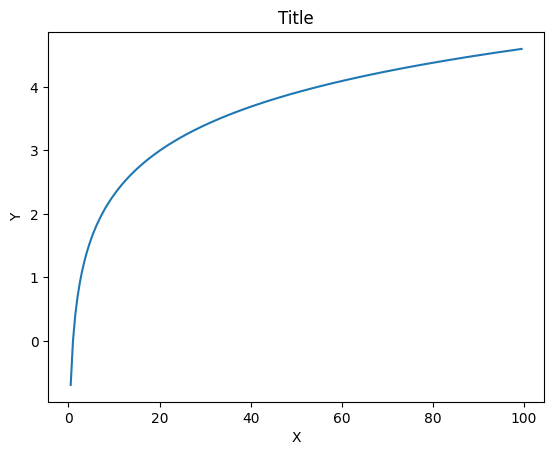

In [16]:
#6
y=np.log(x)
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

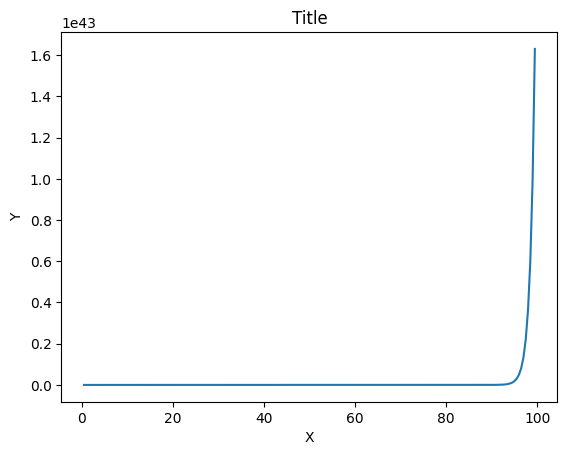

In [17]:
#7
y=np.exp(x)
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

## Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean

In [18]:
mat = np.random.uniform(low=1, high=2, size=(20,5))
mat

array([[1.70265312, 1.44690768, 1.64984743, 1.67618519, 1.71443569],
       [1.46178375, 1.10249082, 1.2314081 , 1.78558654, 1.38718412],
       [1.23732375, 1.30849325, 1.93543798, 1.97599569, 1.21146546],
       [1.05665118, 1.71193348, 1.055686  , 1.57151102, 1.32330948],
       [1.7819602 , 1.70042213, 1.73930972, 1.60525182, 1.98632376],
       [1.14951806, 1.96180256, 1.58206697, 1.68192013, 1.7788079 ],
       [1.25757018, 1.71538634, 1.96801927, 1.84647617, 1.07634554],
       [1.67136549, 1.81475297, 1.61095125, 1.53568753, 1.59499727],
       [1.18798226, 1.25000091, 1.70559113, 1.26804048, 1.42320495],
       [1.04546902, 1.71505146, 1.05156104, 1.61696284, 1.86752977],
       [1.32849672, 1.84142609, 1.17333034, 1.8535689 , 1.11758117],
       [1.3487691 , 1.79116479, 1.48090318, 1.41752522, 1.7769063 ],
       [1.53018294, 1.29409562, 1.30283891, 1.44541108, 1.23852792],
       [1.53178051, 1.85030648, 1.00187577, 1.12681414, 1.58861127],
       [1.1437022 , 1.94241197, 1.

In [19]:
df = pd.DataFrame(mat, columns=['a', 'b', 'c', 'd', 'e'])
df

,a,b,c,d,e
0,1.702653,1.446908,1.649847,1.676185,1.714436
1,1.461784,1.102491,1.231408,1.785587,1.387184
2,1.237324,1.308493,1.935438,1.975996,1.211465
3,1.056651,1.711933,1.055686,1.571511,1.323309
4,1.781960,1.700422,1.739310,1.605252,1.986324
5,1.149518,1.961803,1.582067,1.681920,1.778808
6,1.257570,1.715386,1.968019,1.846476,1.076346
7,1.671365,1.814753,1.610951,1.535688,1.594997
8,1.187982,1.250001,1.705591,1.268040,1.423205
9,1.045469,1.715051,1.051561,1.616963,1.867530


In [20]:
print(f"The column with the highest standard deviation {df.std().idxmax()}")
print(f"The row with the lowest mean {df.mean(axis = 1).idxmin()}")

The column with the highest standard deviation c
The row with the lowest mean 16


## Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [21]:
# Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”.
df['f'] = df.sum(axis=1)
df

,a,b,c,d,e,f
0,1.702653,1.446908,1.649847,1.676185,1.714436,8.190029
1,1.461784,1.102491,1.231408,1.785587,1.387184,6.968453
2,1.237324,1.308493,1.935438,1.975996,1.211465,7.668716
3,1.056651,1.711933,1.055686,1.571511,1.323309,6.719091
4,1.781960,1.700422,1.739310,1.605252,1.986324,8.813268
5,1.149518,1.961803,1.582067,1.681920,1.778808,8.154116
6,1.257570,1.715386,1.968019,1.846476,1.076346,7.863797
7,1.671365,1.814753,1.610951,1.535688,1.594997,8.227755
8,1.187982,1.250001,1.705591,1.268040,1.423205,6.834820
9,1.045469,1.715051,1.051561,1.616963,1.867530,7.296574


In [22]:
# Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise.
df['g'] = np.where(df['f']<8, 'LT8', 'GT8')
df

,a,b,c,d,e,f,g
0,1.702653,1.446908,1.649847,1.676185,1.714436,8.190029,GT8
1,1.461784,1.102491,1.231408,1.785587,1.387184,6.968453,LT8
2,1.237324,1.308493,1.935438,1.975996,1.211465,7.668716,LT8
3,1.056651,1.711933,1.055686,1.571511,1.323309,6.719091,LT8
4,1.781960,1.700422,1.739310,1.605252,1.986324,8.813268,GT8
5,1.149518,1.961803,1.582067,1.681920,1.778808,8.154116,GT8
6,1.257570,1.715386,1.968019,1.846476,1.076346,7.863797,LT8
7,1.671365,1.814753,1.610951,1.535688,1.594997,8.227755,GT8
8,1.187982,1.250001,1.705591,1.268040,1.423205,6.834820,LT8
9,1.045469,1.715051,1.051561,1.616963,1.867530,7.296574,LT8


In [23]:
num_rows = (df['g'] == 'LT8').sum()
std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print(f"The number of rows in the dataframe where the value in the column “g” is “LT8”: {num_rows}")
print(f"The standard deviation of the column “f” for the rows where the value in the column “g” is “LT8”: {std_lt8}")
print(f"The standard deviation of the column “f” for the rows where the value in the column “g” is “GT8”: {std_gt8}")

The number of rows in the dataframe where the value in the column “g” is “LT8”: 15
The standard deviation of the column “f” for the rows where the value in the column “g” is “LT8”: 0.4718679906654441
The standard deviation of the column “f” for the rows where the value in the column “g” is “GT8”: 0.3112046226518022


## Q12. Write a small piece of code to explain broadcasting in numpy.
Reference: [Numpy Documentation](https://numpy.org/doc/stable/user/basics.broadcasting.html)

In [24]:
# NumPy operations are usually done on pairs of arrays on an element-by-element basis. In the simplest case, the two arrays must have exactly the same shape, as in the following example:

a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b



array([2., 4., 6.])

In [25]:
# NumPy’s broadcasting rule relaxes this constraint when the arrays’ shapes meet certain constraints. The simplest broadcasting example occurs when an array and a scalar value are combined in an operation:

a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b

array([2., 4., 6.])

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimension and works its way left. Two dimensions are compatible when

they are equal, or

one of them is 1.

If these conditions are not met, a ValueError: operands could not be broadcast together exception is thrown, indicating that the arrays have incompatible shapes.

## Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [26]:
def argmin(array):
  idx=0
  a=array[0]
  for i,num in enumerate(array):
    if num<a:
      a=num
      idx=i
  return idx


def test_argmin():
  test_cases=[
      np.array([1, 3, 2, 4]),
        np.array([-1, -3, -2, -4]),
        np.array([10, -10, 10, -10]),
        np.random.randint(-1000, 1000, 1000),
        np.array([42]),
        np.array([2, 2, 2, 2]),
        np.random.rand(100)
  ]
  for i, test_case in enumerate(test_cases):
        assert argmin(test_case) == np.argmin(test_case), f"Test case {i+1} failed!"
        print(f"Test case {i+1} passed: Custom argmin result = {argmin(test_case)}, Numpy argmin result = {np.argmin(test_case)}")
test_argmin()

Test case 1 passed: Custom argmin result = 0, Numpy argmin result = 0
Test case 2 passed: Custom argmin result = 3, Numpy argmin result = 3
Test case 3 passed: Custom argmin result = 1, Numpy argmin result = 1
Test case 4 passed: Custom argmin result = 195, Numpy argmin result = 195
Test case 5 passed: Custom argmin result = 0, Numpy argmin result = 0
Test case 6 passed: Custom argmin result = 0, Numpy argmin result = 0
Test case 7 passed: Custom argmin result = 70, Numpy argmin result = 70
